In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import quandl

In [3]:
df = quandl.get('BITFINEX/ETHUSD',start_date='2016-01-01',end_date='2023-01-31', index_col='Date', parse_dates=True)
df

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2016-03-14,14.950,11.400,12.9325,12.925,12.925,12.940,22922.937642
2016-03-15,13.421,11.607,12.9665,12.765,12.924,13.009,18157.378517
2016-03-16,13.890,12.621,12.8200,12.800,12.800,12.840,5431.139409
2016-03-17,12.893,10.436,11.2450,11.368,11.172,11.318,25158.103084
2016-03-18,11.200,8.338,10.8155,10.750,10.751,10.880,46391.436185
...,...,...,...,...,...,...,...
2023-01-27,1621.600,1552.300,1597.5500,1597.400,1597.300,1597.800,6853.328564
2023-01-28,1606.100,1556.600,1569.7500,1569.900,1569.600,1569.900,5160.882312
2023-01-29,1666.100,1567.200,1644.2500,1644.300,1644.200,1644.300,24443.034364


<AxesSubplot: xlabel='Date'>

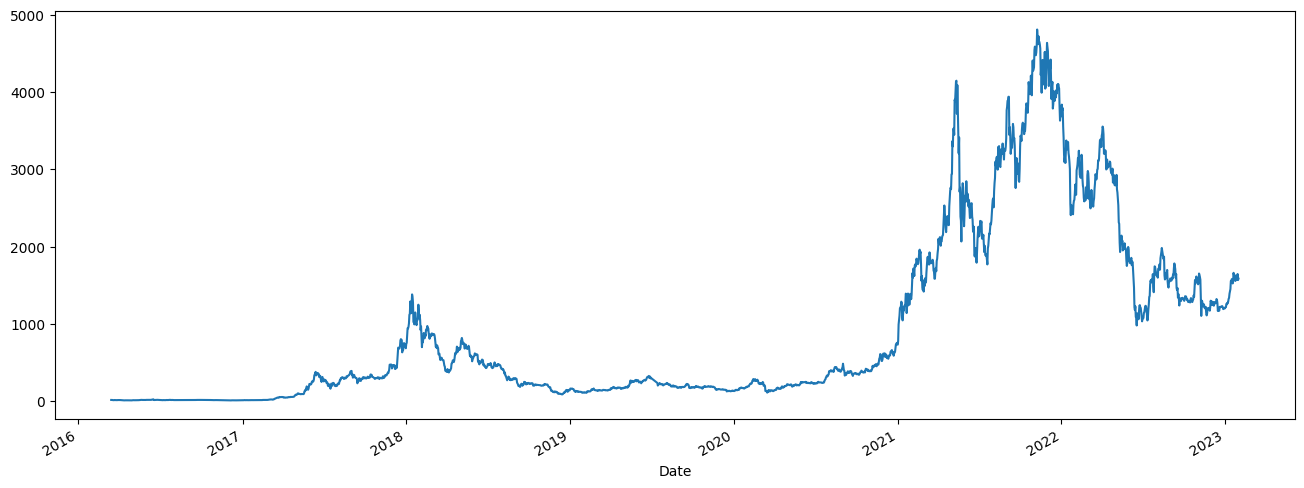

In [4]:
df['Mid'].plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

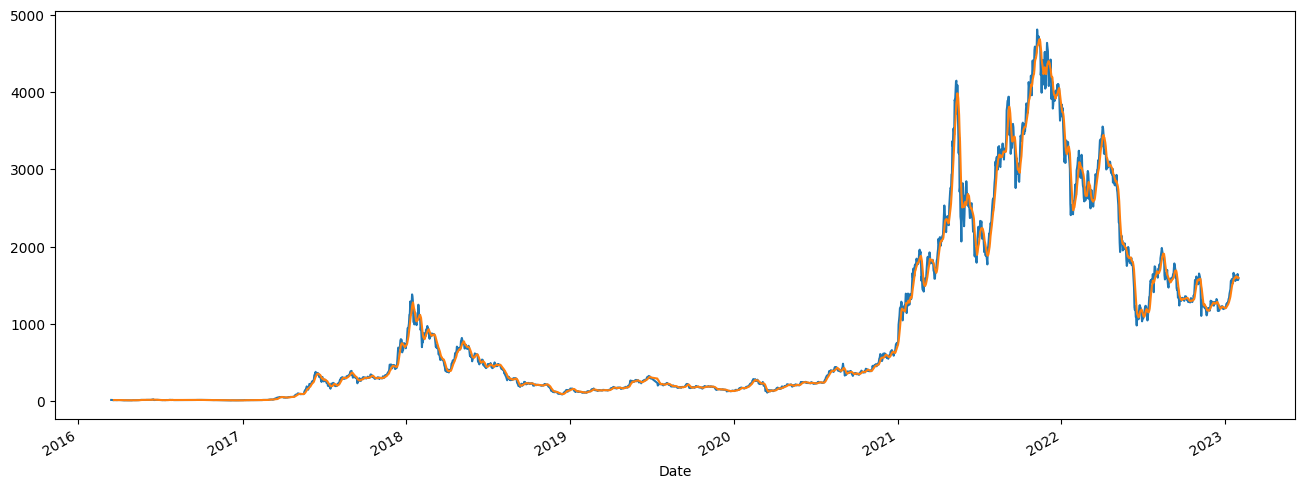

In [5]:
#applyin MA7
df['Mid'].plot()
df.rolling(window=7).mean()['Mid'].plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

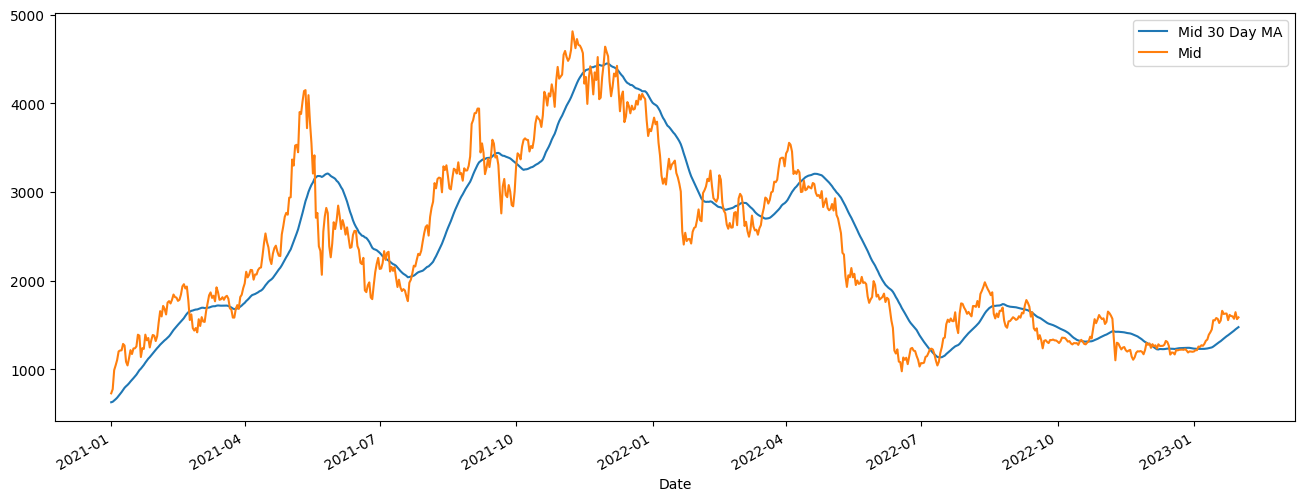

In [6]:
#applying MA30+zoom-in the recent bullrun
df['Mid 30 Day MA'] = df['Mid'].rolling(window=30).mean()
df[['Mid 30 Day MA', 'Mid']]['2021-01-01':].plot(figsize = (16,6))

<AxesSubplot: xlabel='Date'>

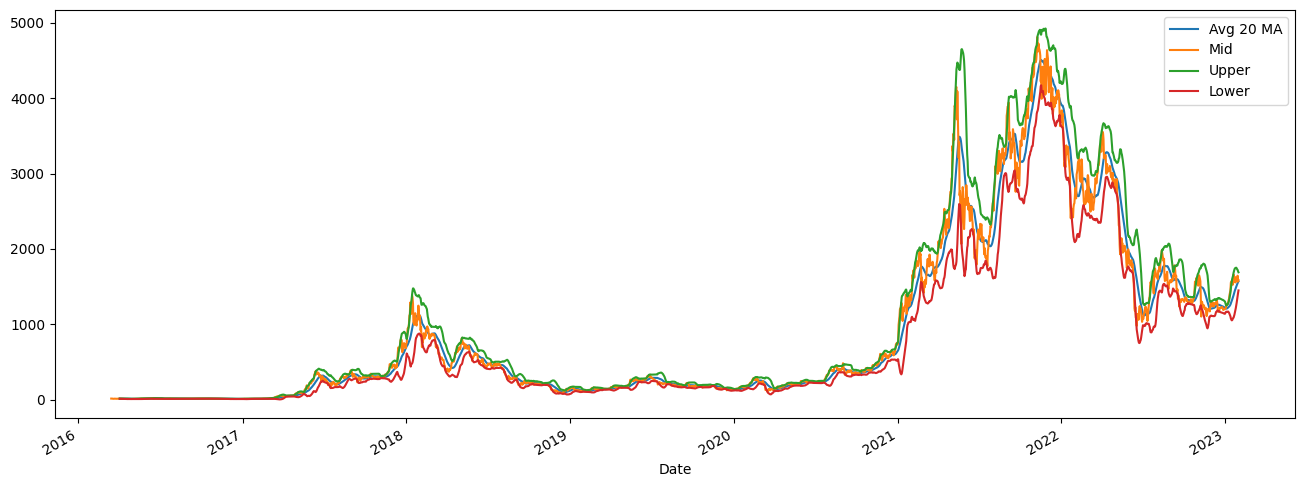

In [7]:
#applying Bollinger Bands
df['Avg 20 MA'] = ((df['High'] + df['Low'])/2).rolling(20).mean()
df['Upper'] = df['Avg 20 MA'] + 2*(df['Mid'].rolling(20).std())
df['Lower'] = df['Avg 20 MA'] -2*(df['Mid'].rolling(20).std())
df[['Avg 20 MA', 'Mid', 'Upper', 'Lower']].plot(figsize =(16,6))

<AxesSubplot: xlabel='Date'>

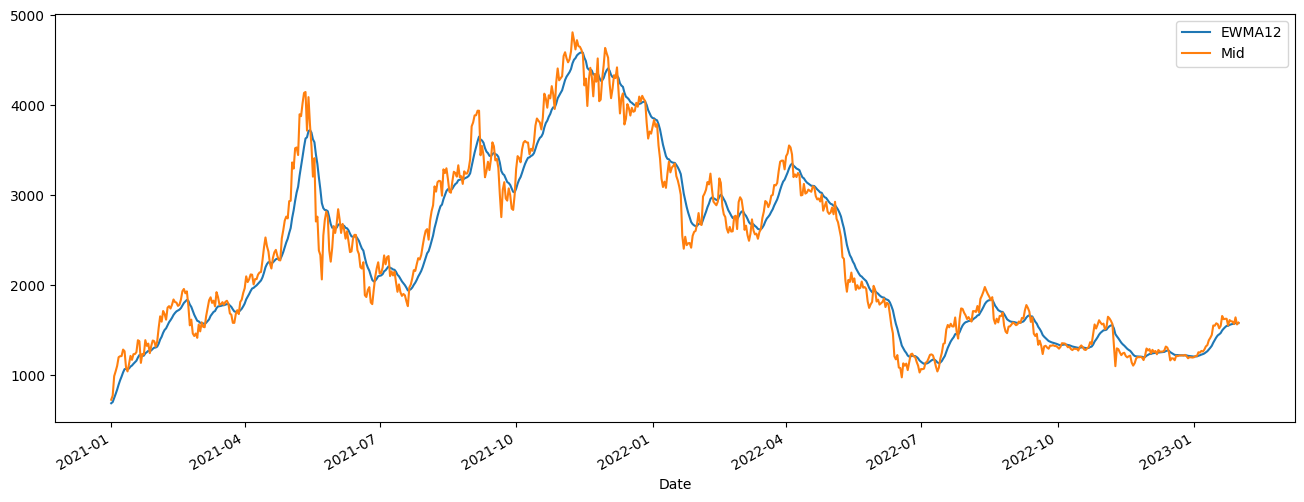

In [8]:
#applying EWMA12
df['EWMA12'] = df['Mid'].ewm(span=12).mean()
df[['EWMA12', 'Mid']]['2021-01-01':].plot(figsize=(16,6))